In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [9]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
digits['target'][0]

0

In [11]:
digits['data'].shape

(1797, 64)

In [12]:
digits.target.shape

(1797,)

In [14]:
digits.images.shape

(1797, 8, 8)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
for x,y in zip ([1,2,3,4], [5,6,7,8]):
    print ("x is "+str(x))
    print ("y is "+str(y))

x is 1
y is 5
x is 2
y is 6
x is 3
y is 7
x is 4
y is 8


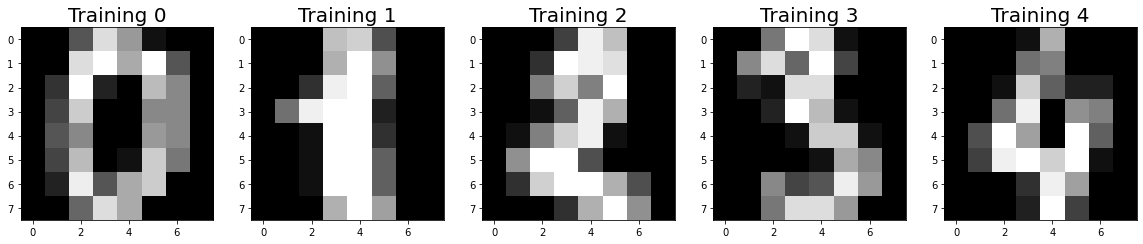

In [17]:
plt.figure(figsize=(20,4))

for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow (  np.reshape(image, (8,8)) , cmap=plt.cm.gray )
    plt.title ('Training '+str(label), fontsize=20)

# Preparing Data for Learning

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits["data"], digits["target"], test_size=0.25)

In [19]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='auto', max_iter=10000)

In [21]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [22]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
clf.predict(X_test[:9])

array([2, 9, 9, 3, 4, 2, 1, 5, 9])

In [24]:
y_test[:9]

array([2, 9, 5, 3, 4, 2, 1, 5, 9])

In [25]:
clf.score(X_test, y_test)

0.9688888888888889

# Live Demo

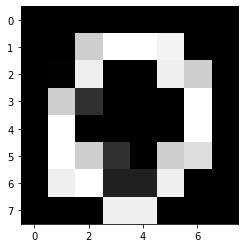

In [44]:
from PIL import Image
import numpy as np

im = Image.open("C:\\Users\\adity\\Desktop\\number.png")
# im = Image.open("/home/joshi/Desktop/number.png")
p = np.array(im)
try: 
    p = np.mean(p, axis=2)
except:
    pass

p = p.flatten()
p.shape
plt.imshow(np.reshape(p, (8,8)), cmap=plt.cm.gray)

In [45]:
clf.predict(  [p]  )

array([0])

# How did the Model Perform?

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 48,  0,  2,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 36,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  1, 32,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 46]], dtype=int64)

In [ ]:
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, square=True, cmap='Blues_r')

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print (classification_report(y_test, y_pred))

## Homework:
1. Find misclassified images, print and see how good or bad they are labelled

In [ ]:
clf.classes_

In [ ]:
clf.intercept_

In [ ]:
clf.coef_.shape

In [ ]:
clf.coef_[0].round(2)

In [ ]:
coef = clf.coef_.copy()

In [ ]:
plt.imshow(coef[6].reshape(8,8).round(2), cmap=plt.cm.gray)